# Case Study - Breast Cancer Wisconsin (Part 1)

+ 중간발표 범위에 해당하는 Coverage-Homogeneity 까지의 예시
+ 예시에서 사용한 코드 말고도 다양한 시각화 방법이 있습니다.  
강의자료-실습코드 또는 matplotlib, seaborn, kaggle 등을 참고 바랍니다.
    - matplotlib : https://matplotlib.org/stable/plot_types/index.html
    - seaborn : https://seaborn.pydata.org/tutorial.html
+ 코드는 어떻게 구현하든 상관이 없습니다. 발표 자료에서 그래프, 표 등의 결과만을 보여주고 설명하면 됩니다.

## 1. Dataset
+ 유방암 데이터셋
+ predictors
    - `Clump_Thickness` : 암세포의 그룹화를 나타내는 덩어리 두께
    - `Uniformity_of_Cell_Size`  : 세포 크기의 균일성여부
    - `Uniformity_of_Cell_Shape` : 세포 모양의 균일성여부
    - `Marginal_Adhesion` : 염색질의 유착성. 서로 분리된 세포가 부분적으로 유착되는것으로, 유착의 기간이 오래되면 유방암 발병률이 높아짐
    - `Single_Epithelial_Cell_Size` : 단일 상피 세포 크기. 상피는 조직표면에 있는 특수 세포의 얇은 층으로, 단일 상피 세포 크기가 커지면 악성 세포인 경우가 많음.
    - `Bare_Nuclei` : 세포질이 사실상 없는 세포학적 준비의 핵으로, 일반적으로 세포의 퇴화에서 볼 수 있음
    - `Bland_Chromatin` : 보통 양성 세포에서 볼 수 있는 핵의 균일한(부드러운) "질감"을 이야기하며, 악성 세포(암)에서 염색질은 더 거칠어지는 경향이 있음
    - `Normal_Nucleoli` : 정상 핵. 정상 세포에서 핵은 보통 매우 작음
    - `Mitoses` : 체세포 분열. 세포가 분열하고 복제하는 과정으로 유사 분열 수를 세어 암의 등급을 결정할 수 있음. 체세포 분열과정에서 분열을 통제하는, 일종의 브레이크 역할을 하는 '기' 또는 G0기가 중간에 존재하는데, 이 조절 기능이 고장나서 체세포 분열을 이어가면 안되는 세포가 무한하게 체세포 분열을 이어가면 암세포로 이어짐(↔ 감수 분열(meiosis))
+ target 
    - `Class` : 0 - 양성 종양(Benign tumor), 1 - 악성 종양(Malignant tumor)
    
### 1.1 Load dataset

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# set figure params (figure size, font size)
plt.rc('figure', figsize=(5, 5))
plt.rc('font', size=13)
plt.style.use('ggplot')

In [2]:
dataset=pd.read_csv('breast-cancer-wisconsin.csv')

In [3]:
df = dataset.copy()
df.columns = ['ID', 'Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion',
              'Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class']
df.head()

,ID,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


#### dataframe shape

In [4]:
df.shape

(699, 11)

#### check dataframe information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   Clump_Thickness              699 non-null    int64 
 2   Uniformity_of_Cell_Size      699 non-null    int64 
 3   Uniformity_of_Cell_Shape     699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


+ Remark
    - null 값은 없음
    - `Bare_Nuclei`의 datatype이 'object'임

## 1.2 Preprocessing

+ Issue
    1. `ID`가 중복된 경우가 54번 있음 
        + 값은 다르므로 그대로 사용. 아마 같은 사람이 시간을 두고 검사한 것으로 보임
    2. missing values
        - 변수 `Bare_Nucleoli`에서 "?" 값이 16개 있음 -> 적은 수이므로 그냥 drop
    3. class 
        - 2는 0으로 4는 1로 변경
+ drop(), dropna(), fillna(), replace() 등 사용

#### issue 1. `ID`의 중복

In [6]:
df['ID'].duplicated().sum()

54

In [7]:
df[df['ID'].duplicated(keep=False) ==True]

,ID,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
4,1017023,4,1,1,3,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2
29,1070935,1,1,3,1,2,1,1,1,1,2
30,1070935,3,1,1,1,1,1,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
689,654546,1,1,1,1,2,1,1,1,8,2
690,654546,1,1,1,3,2,1,1,1,1,2
691,695091,5,10,10,5,4,5,4,4,1,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [8]:
# 중복값 제거 시
len(df['ID'].drop_duplicates())

645

In [9]:
# drop `ID` column
df=df.drop(columns='ID')

#### issue 2. `Bare_Nuclei`의 missing value

In [10]:
# data type이 object였던 `Bare_Nuclei` 값 체크
df['Bare_Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [11]:
# drop '?'
df=df[df['Bare_Nuclei']!='?']
df=df.astype({'Bare_Nuclei':'int64'})
df['Bare_Nuclei'].unique()

array([ 1, 10,  2,  4,  3,  9,  7,  5,  8,  6], dtype=int64)

#### issue 3. `Class`의 값이 0,1이 아님

In [12]:
# check `Class` value
df['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

In [13]:
# 'Class' 값 1,0으로 변경
df.replace({'Class': {2: 0, 4: 1}}, inplace=True)

In [14]:
# check `Class` value
df['Class'].value_counts()

0    444
1    239
Name: Class, dtype: int64

## 2. EDA
### 2.1 Relative frequency histogram

#### 전체 히스토그램

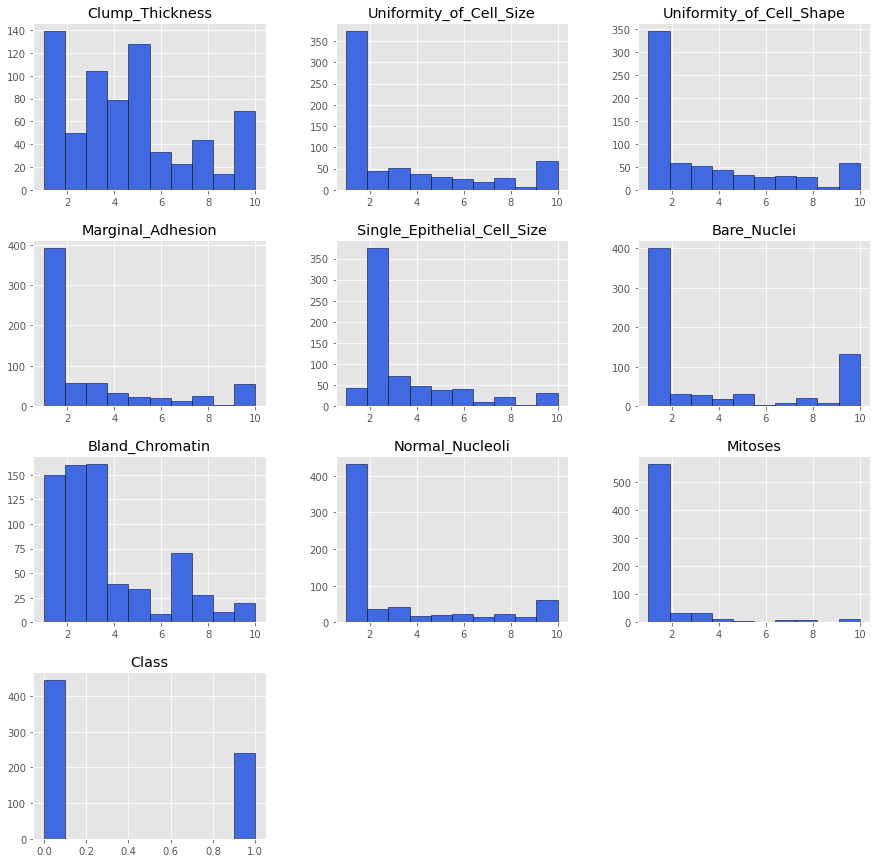

In [15]:
# histogram
df.hist(figsize=(15,15),bins=10, edgecolor = 'black', color='royalblue')
plt.show()

#### density histogram
+ y=0, y=1

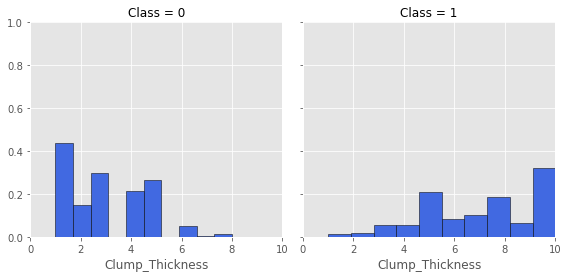

In [20]:
# Relative frequency histogram
col = df.columns[0]
g = sns.FacetGrid(df, col = 'Class', xlim=(0,10), ylim = (0, 1), height = 4)
g.map(plt.hist, col, bins=10, density=True, edgecolor='black', color='royalblue')
g.fig.subplots_adjust(top=0.9)
plt.show()

### 2.2 Correlation heatmap
+ 상관관계 히트맵
    + 전체 dataset, y=1인 dataset, y=0인 dataset

In [21]:
target_name='Class'
df_y1 = df[df[target_name]==1]
df_y0 = df[df[target_name]==0]

#### 전체 dataset

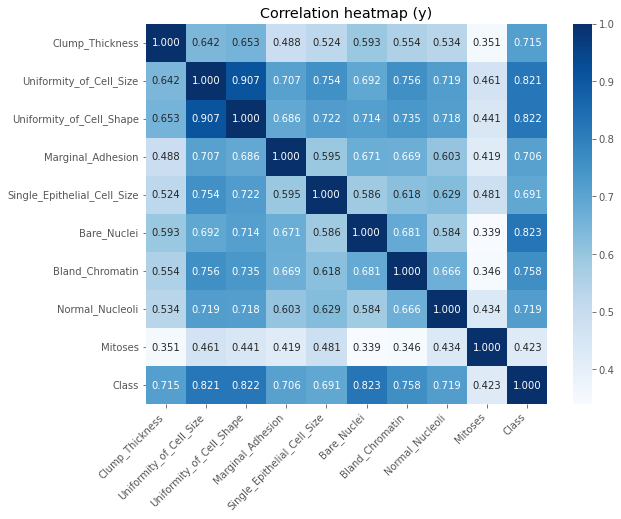

In [22]:
# y(n=683)
plt.figure(figsize = (9,7))
g = sns.heatmap(df.corr(), annot = True, cmap='Blues', fmt = '.3f')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Correlation heatmap (y)')
plt.show()

#### y=1인 subset

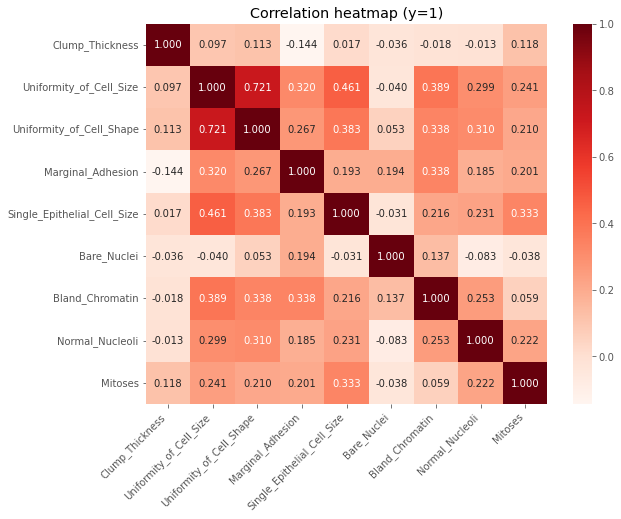

In [23]:
#  y=1(n=239)
plt.figure(figsize = (9,7))
g = sns.heatmap(df_y1.iloc[:,:-1].corr(), annot = True, cmap='Reds', fmt = '.3f')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Correlation heatmap (y=1)')
plt.show()

#### y=0인 subset

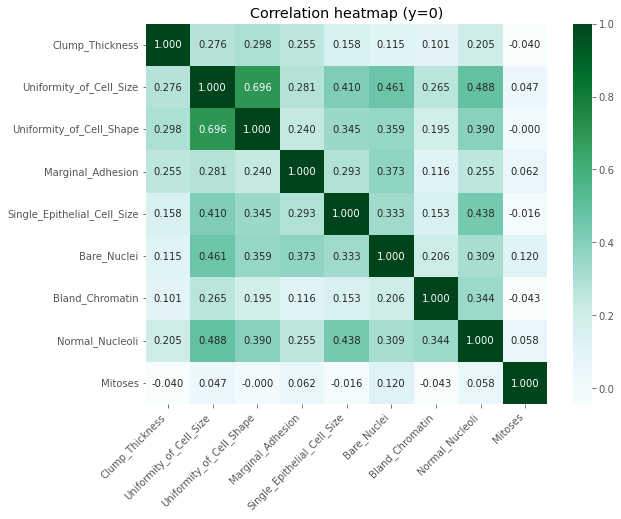

In [24]:
# y=0(n=444)
plt.figure(figsize = (9,7))
g=sns.heatmap(df_y0.iloc[:,:-1].corr(), annot = True, cmap='BuGn', fmt = '.3f')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Correlation heatmap (y=0)')
plt.show()

### 2.3 Scatter plot
+ 예시
    - `Mitoses`, `Bare_Nuclei`의 scatter plot, joint plot, strip plot
    - pairplot

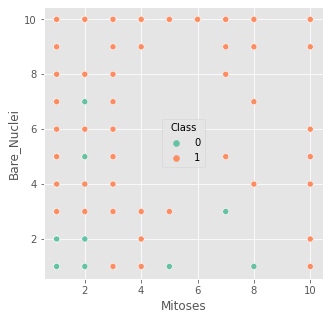

In [25]:
# scatterplot
sns.scatterplot(data=df, x="Mitoses", y="Bare_Nuclei", hue=target_name, palette='Set2')
plt.show()

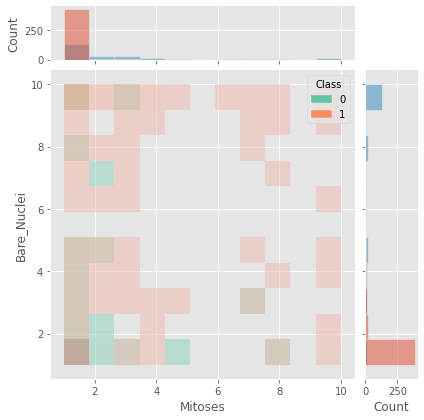

In [26]:
# jointplot
sns.jointplot(data=df, x="Mitoses", y="Bare_Nuclei", hue=target_name, kind="hist", 
              marginal_ticks=True, alpha=0.5, palette='Set2')
plt.show()

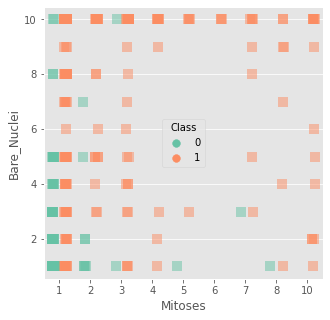

In [27]:
# stripplot - 주) 보통 categorical 변수에 씀
sns.stripplot(data=df, x="Mitoses", y="Bare_Nuclei", hue=target_name, 
              dodge=True, alpha=0.5, palette="Set2", size=10, marker="s")
plt.show()

#### pairplot

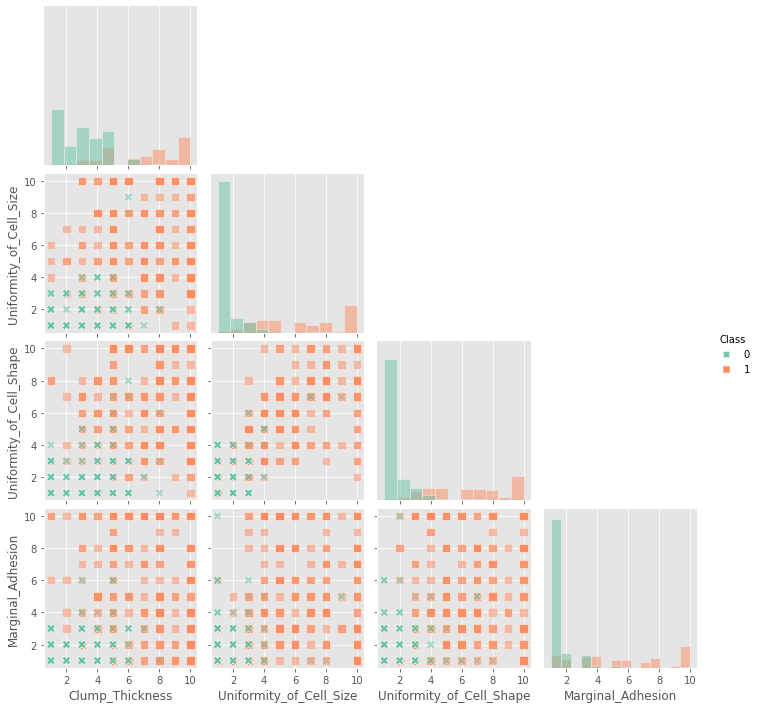

In [28]:
predictors = df.columns[0:4]
sns.pairplot(df,vars=predictors, hue = 'Class', hue_order=[0,1],  
             diag_kind='hist', 
             kind = 'scatter', markers=["X", "s"], plot_kws={"s": 70, "alpha" : 0.5}, 
             palette="Set2",corner=True)
plt.show()

#### pairGrid 
+ 주) 예시처럼 stripplot을 같이 쓰지는 말 것. 대각 histplot과 x축이 서로 안맞음

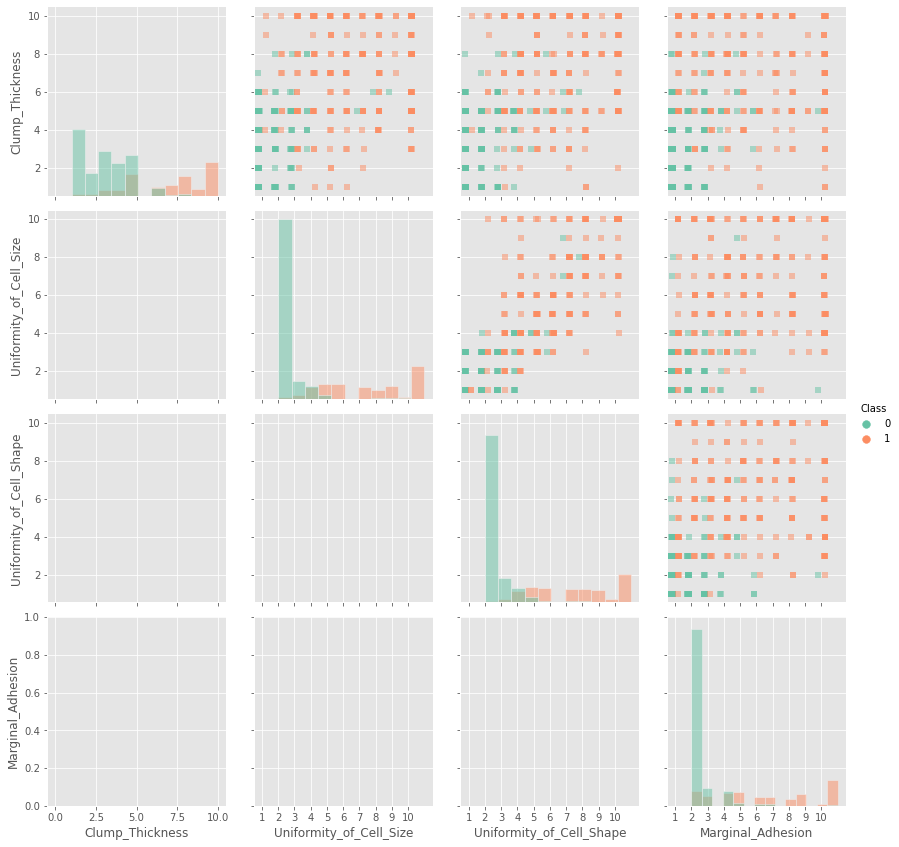

In [29]:
# pairGrid
predictors = df.columns[0:4]
g = sns.PairGrid(df, vars=predictors, hue=target_name, height=3)
g.map_diag(sns.histplot, palette="Set2") # diagonal
g.map_upper(sns.stripplot, dodge=True, alpha=0.5, palette="Set2", size=6, marker="s") # upper triangle
g.set(xlim=[-0.5,10.5])
g.add_legend()
plt.show()

### 2.4 Coverage-Homogeneity plot
+ 변수 $X_i$의 cut point를 조절할때의 coverage와 homogeneity 변화
+ Coverage : 
    - $ \frac{\text{# of samples $\in$ Rule}}{\text{# of total samples}}$
    - 룰을 만족하는 subset의 샘플 수 / 모든 샘플 수  
    - 가령, 전체 샘플 수 600개이고 $X_1<5$에 해당하는 샘플 수가 100개면, coverage=100/600 
+ Homogeneity :
    - $\max \Pr(Y=class_i|x, Rule)$
    - 예를 들면, $X_1<5$을 만족하는 subset에서, $\frac{y=1\text{인 샘플 수}}{\text{subset의 샘플 수}}, \frac{y=0\text{인 샘플 수}}{\text{subset의 샘플 수}}$ 중 큰 값
    - classification tree 리프 노드의 사후 확률과 같음. 분류된 subset에서 샘플들의 y 값이 모두 1이면 homogeneity=1

In [30]:
def _coverage(subset,n):
    return subset.shape[0]/n
def _homogeneity(y):
    _, counts = np.unique(y, return_counts=True)
    ps = counts / len(y)
    return max(ps)
def coverHomo(dataset, target_name, col, operator):         
    coverage = []
    homogeneity = []
    unique_values = np.unique(dataset[col])
    ops = {"<=": (lambda x,y: x<=y), ">=": (lambda x,y: x>=y)}
    for cut_point in unique_values:
        subset = dataset[ops[operator] (dataset[col],cut_point)]
        coverage.append(_coverage(subset[target_name], dataset.shape[0]))
        homogeneity.append(_homogeneity(subset[target_name]))
    return coverage, homogeneity, unique_values

#### split  numeric and categorical variables

In [31]:
num_col = df.drop(columns=target_name).select_dtypes(include=['number']).columns.tolist()
print('numeric:',num_col)
cat_col = df.drop(columns=target_name).select_dtypes(include=['object']).columns.tolist()
print('categorical:',cat_col)

numeric: ['Clump_Thickness', 'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']
categorical: []


#### cover-homo plot for all numeric columns

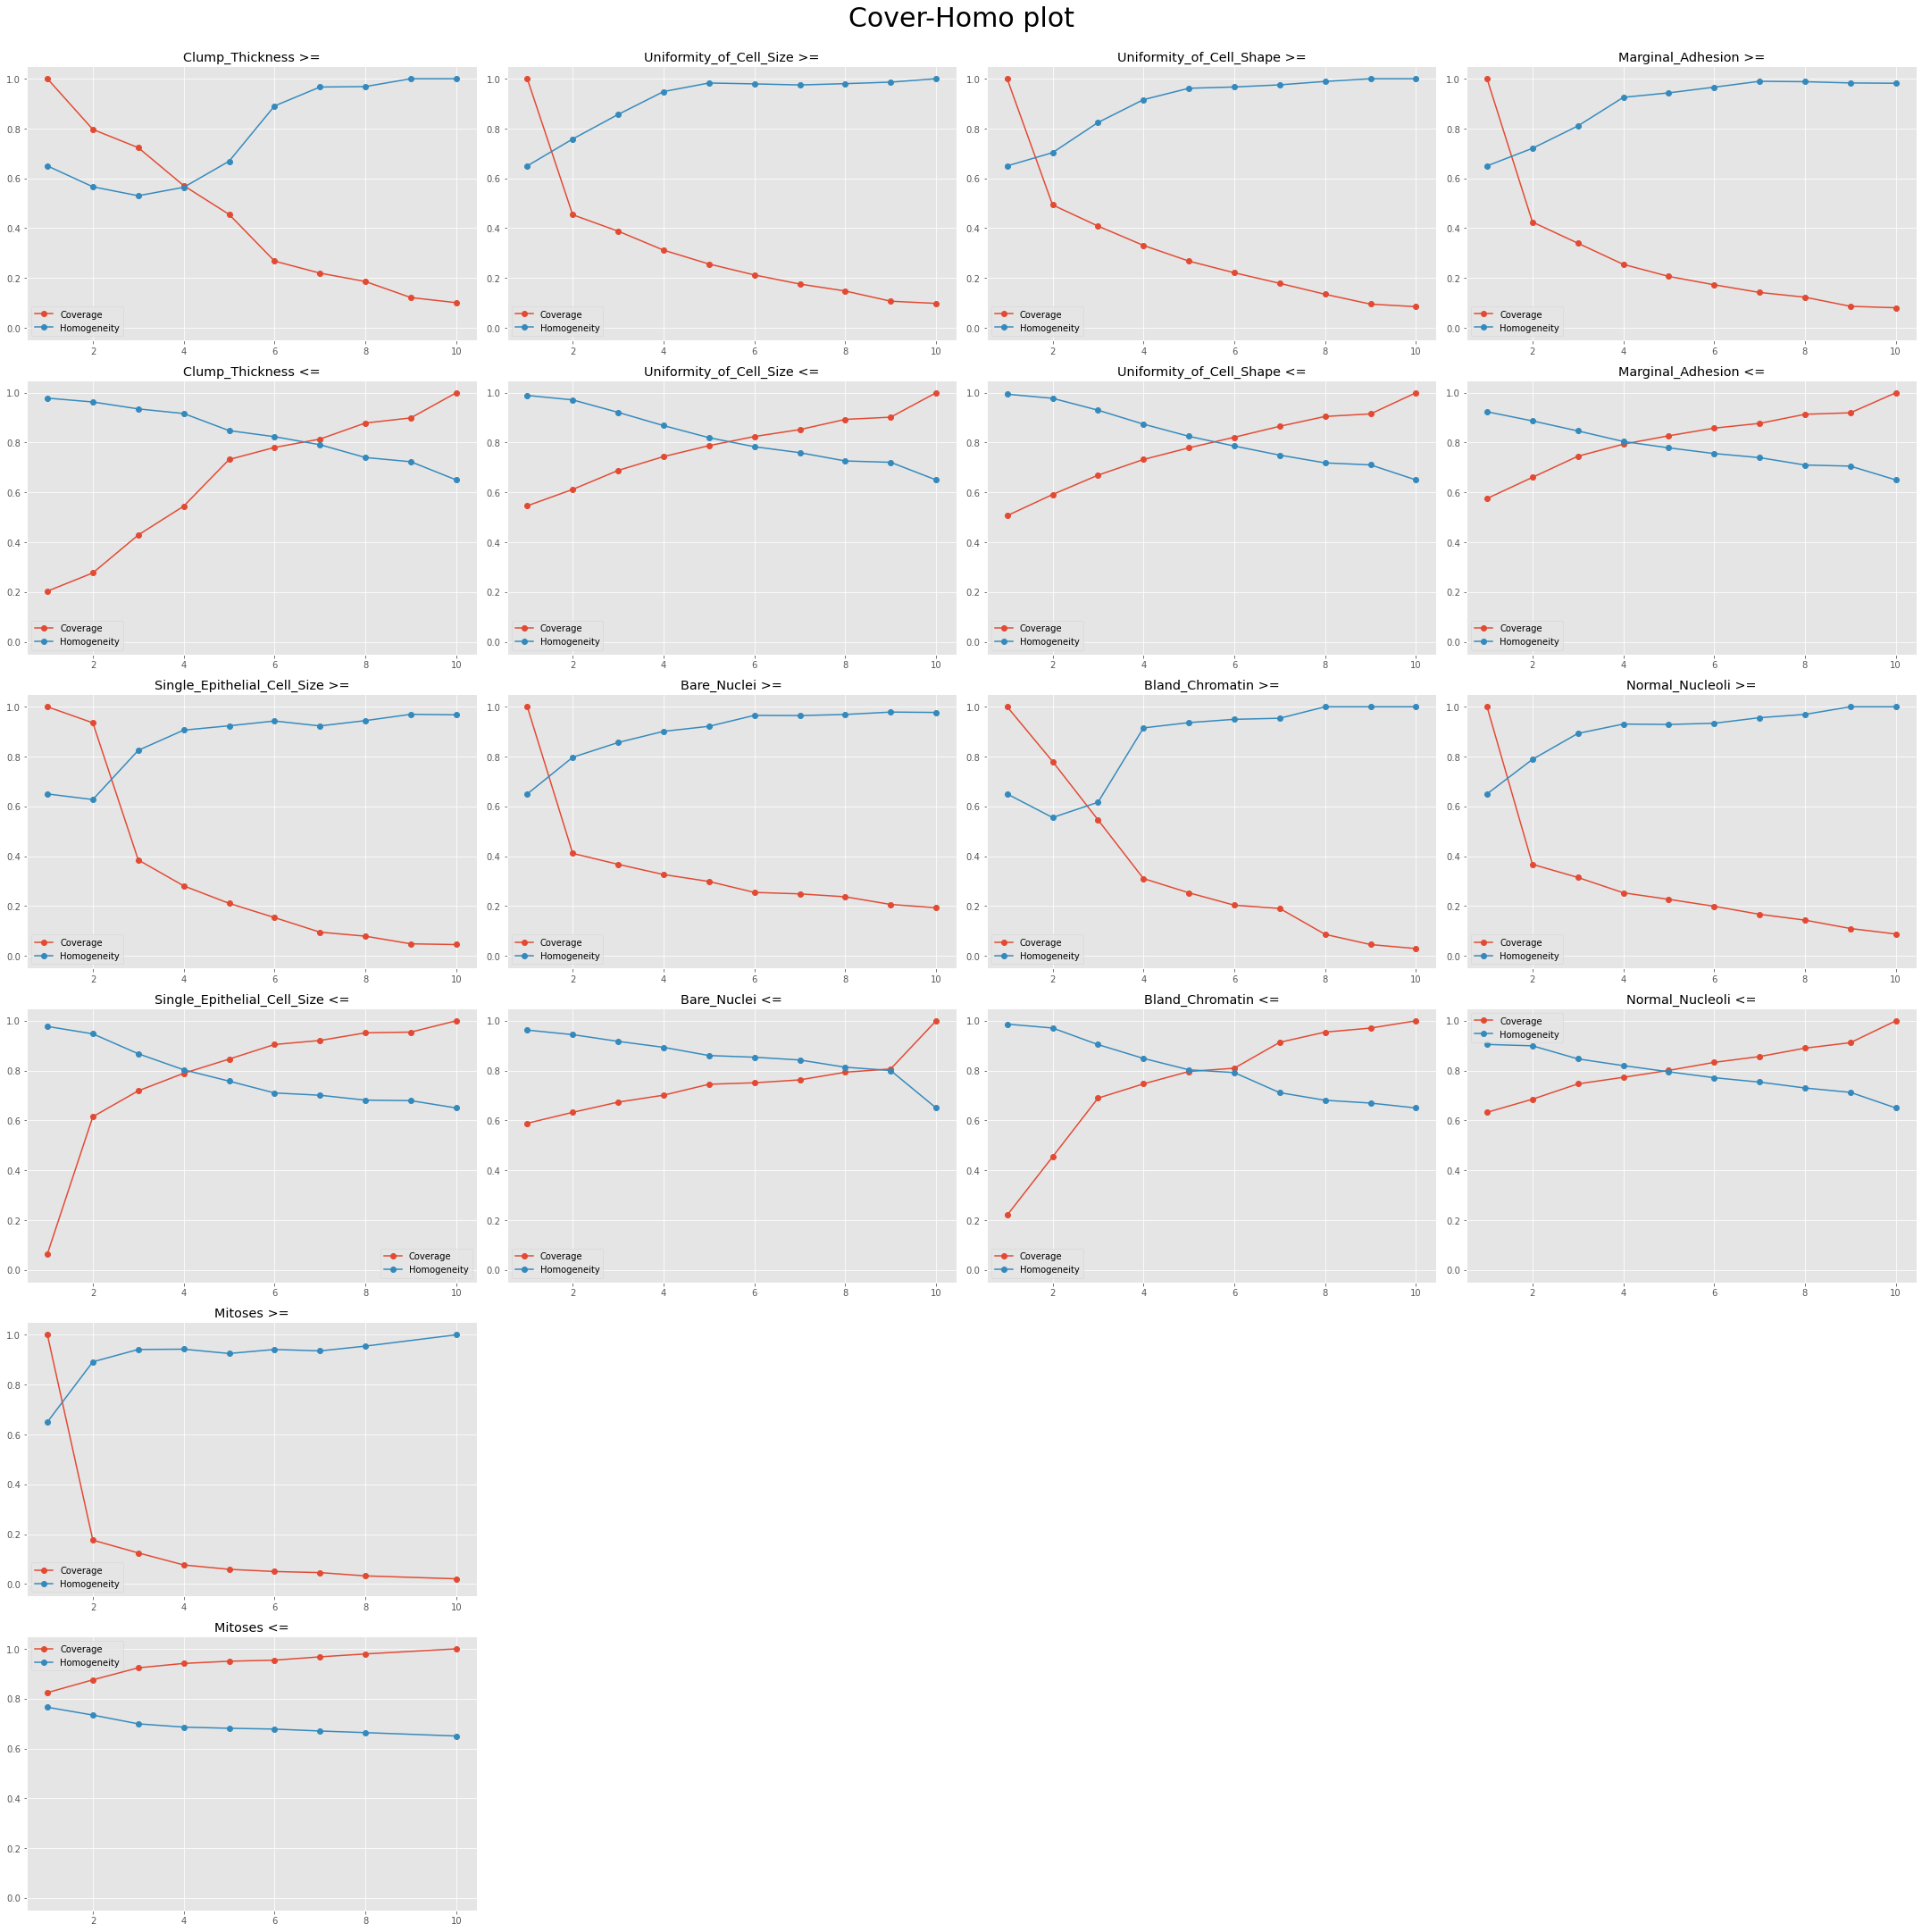

In [32]:

ncols = 4
nrows = len(num_col) // ncols + (len(num_col) % ncols > 0)
n=1
i=0

plt.figure(figsize=(30, 30)) 
for col in num_col[:]:
    ax1 = plt.subplot(nrows*2, ncols, n+i)
    cover, homo, cut_points = coverHomo(df, target_name, col, '>=')
    ax1.plot(cut_points,cover,'-o')
    ax1.plot(cut_points,homo,'-o')
    ax1.set_title(col +' >=')
    ax1.legend(['Coverage','Homogeneity'])
    ax1.set_ylim(-0.05,1.05)
    
    ax2 = plt.subplot(nrows*2, ncols, n+i+ncols)
    cover, homo, cut_points = coverHomo(df, target_name, col, '<=')
    ax2.plot(cut_points,cover,'-o')
    ax2.plot(cut_points,homo,'-o')
    ax2.set_title(col +' <=')
    ax2.legend(['Coverage','Homogeneity'])
    ax2.set_ylim(-0.05,1.05)
    if n % (ncols) == 0 : i+=ncols
    n+=1

plt.suptitle("Cover-Homo plot", fontsize=30, y=1)
plt.savefig('coverHomo.png', dpi=300, transparent=True) # save figure (dpi=300, transparent=True)
plt.tight_layout()
plt.show()

### 2.5 save figure
+ dpi=300, tranparent=True

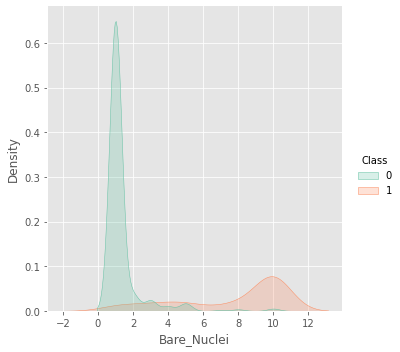

In [33]:
sns.displot(data=df, x="Bare_Nuclei", hue=target_name, kind="kde", fill=True, palette="Set2")
plt.savefig('example.png', dpi=300, transparent=True)

### 3. Advancement
+ 더 할 수 있는 것들
    + PDP : scikit-learn에서 제공함
    + Weighted Accuracy에 대한 plot
        - $WA = Coverage\times(Homogeneity -\Pr(y=class_i))$
    + kaggle에서 다른 사람이 작성한 코드를 참고하여 데이터셋에 적절한 전처리, EDA, 시각화 기법을 활용
    + 등등